In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 선형회귀 - 최소제곱법

In [17]:
# 시간과 성적 데이터 입력
X = [2, 4, 6, 8]
Y = [81, 93, 91, 97]

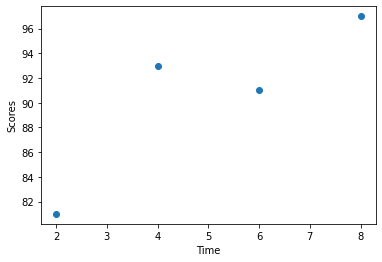

In [18]:
plt.scatter(X, Y)
plt.xlabel('Time')
plt.ylabel('Scores')
plt.show()

In [19]:
# 평균을 구하는 메서드
meanx = np.mean(X)
meany = np.mean(Y)

In [20]:
# 최소 제곱법에서 분모가 되는 값을 구하기
# X의 각 원소와 X의 평균 갑들의 차를 구해 제곱한다.
diffx = sum([(i-meanx)**2 for i in X])
print(diffx)

20.0


In [26]:
# 최소 제곱법에서 분자가 되는 값을 구하기
# X의 각 원소와 X의 평균 값들의 차와 Y의 각 원소와 Y의 평균값들의 차를 구해 굽한 후
def top(X, meanx, Y, meany):
    diffvalue = 0
    for i in range(len(X)):
        diffvalue += (X[i]-meanx) * (Y[i]-meany)
#         print(diffvalue)
    return diffvalue

diffnum = top(X, meanx, Y, meany)

print('분모:', diffx)
print('분자:', diffnum)

a = diffnum / diffx
b = meany - (meanx*a)

print('기울기 a = ', a)
print('y절편 b = ', b)

분모: 20.0
분자: 46.0
기울기 a =  2.3
y절편 b =  79.0


### 경사하강법 - 최적값과 학습률

In [51]:
# data 입력
Score_data = [[2, 81], [4, 93], [6, 91], [8, 97]]
X = [i[0] for i in Score_data]
Y = [i[1] for i in Score_data]

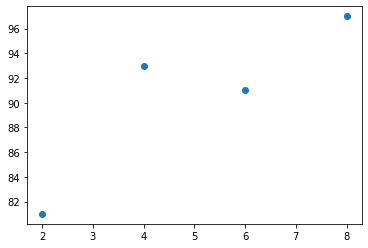

In [52]:
# 그래프 시각화
plt.figure(figsize=(6,4))
plt.scatter(X, Y)
plt.show()

In [53]:
# 넘파이 배열로 변환
X_data = np.array(X)
Y_data = np.array(Y)

In [54]:
# 가중치와 절편 초기화
a = 0
b = 0

In [55]:
# 학습률과 학습 반복 횟수를 설정
lr = 0.03
epochs = 1000

In [56]:
for i in range(epochs):
    # 예측값과 오차계산
    predict_y = a * X_data + b
    err = Y_data - predict_y
    
    # 편미분 연산
    a_dif = -(1/len(X_data)) * sum(X_data * err)
    b_dif = -(1/len(X_data)) * sum(err)
    
    # 가중치와 절편 업데이트
    a = a - lr * a_dif
    b = b - lr * b_dif
    
    if i % 100 == 0:
        print('epoch=%.f, 기울기=%.04f, 절편=%.04f' %(i, a, b))

epoch=0, 기울기=13.9200, 절편=2.7150
epoch=100, 기울기=10.1307, 절편=32.2700
epoch=200, 기울기=7.1088, 절편=50.3032
epoch=300, 기울기=5.2531, 절편=61.3774
epoch=400, 기울기=4.1135, 절편=68.1780
epoch=500, 기울기=3.4136, 절편=72.3542
epoch=600, 기울기=2.9839, 절편=74.9189
epoch=700, 기울기=2.7200, 절편=76.4938
epoch=800, 기울기=2.5579, 절편=77.4609
epoch=900, 기울기=2.4584, 절편=78.0549


### 다중선형회귀

In [57]:
import numpy as np
import matplotlib.pyplot as plt

# 3D 그래프를 그리기 위해 필요한 라이브러리
from mpl_toolkits import mplot3d

In [59]:
# 독립 변수 2개와 1개의 종속변수에 해당하는 데이터를 입력한다.
input_data = [[2, 0, 81], [4, 4, 93], [6, 2, 91], [8, 3, 97]]
X1 = [i[0] for i in input_data]
X2 = [i[1] for i in input_data]
Y = [i[2] for i in input_data]

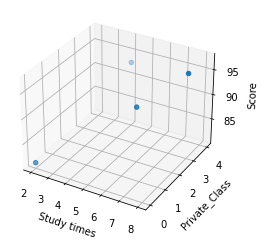

In [60]:
ax = plt.axes(projection='3d')
ax.set_xlabel('Study times')
ax.set_ylabel('Private_Class')
ax.set_zlabel('Score')
ax.scatter(X1, X2, Y)

In [61]:
# 입력데이터를 머신러닝에서 사용하는 넘파이 어레이 형태로 바꿔준다.
X1_data = np.array(X1)
X2_data = np.array(X2)
Y_data = np.array(Y)

In [62]:
# 기울기와 절편을 초기화한다.
a1 = 0
a2 = 0
b = 0

# 학습률은 0.03으로 반복횟수는 1000으로 맞춰준다
lr = 0.03
epochs = 1000

In [63]:
# Y값을 예측하고 실제 데이터와의 오차를 구한다.
for i in range(epochs) :
    predictY = a1 * X1_data + a2 * X2_data + b
    err = Y_data - predictY
    
    # 편미분 연산
    # 오차 함수를 a1로 미분
    diff_a1 = -(2/len(X1)) * sum(err * X1_data)
    diff_a2 = -(2/len(X2)) * sum(err * X2_data)
    diff_b = -(2/len(Y)) * sum(err)
    
    # 학습률을 곱해 기존의 a1값 업데이트
    a1 -= lr * diff_a1
    a2 -= lr * diff_a2
    b -= lr * diff_b
    print(a1, a2, b)
    
    if i % 100 == 0:
        print('Epoch = %.04d, a1 = %.04f, a2 = %.04f, b = %.04f' %(i, a1, a2, b))
print('y = %.04fx1 + %.04fx2 + %.04f' %(a1, a2, b))

27.84 12.674999999999999 5.43
Epoch = 0000, a1 = 27.8400, a2 = 12.6750, b = 5.4300
-5.947500000000002 -2.6118750000000013 0.4710749999999999
34.49394000000001 15.774745500000002 8.009663625
-14.462352577499999 -6.398846581875006 0.4813111649999984
44.25658904636251 20.275309684415625 11.084982556903125
-26.70550755800511 -11.88606212964985 -0.16425991781592408
58.524812482875745 26.811845880896968 14.891866332157294
-44.360649673047405 -19.836062768777524 -1.748688586555959
79.32525527405117 36.30500423980272 19.772296104336583
-69.86979635758804 -31.355631692356816 -4.68279381651233
109.59806795106245 50.08968641796624 26.222122998222993
-106.77504666633051 -48.050806780437874 -9.56273243341456
153.60848635183032 70.10179944730137 34.96040442784857
-160.2143139787139 -72.25175726446193 -17.253508668757128
217.54387444987861 99.14914571925809 47.02998327568482
-237.64042820362965 -107.33900248174194 -29.010112727919697
310.3797983170383 141.30436281491606 63.94338783187953
-349.8642579

-5.868170693506731e+74 -2.6622631049520364e+74 -9.88551381822937e+73
7.067667191214855e+74 3.2064489231834455e+74 1.1906184283069834e+74
-8.512349441547066e+74 -3.8618702553703836e+74 -1.4339894393856572e+74
1.025233518424225e+75 4.651264444439508e+74 1.7271072439166038e+74
-1.2347986587231595e+75 -5.602016510529375e+74 -2.0801404459904013e+74
1.487200428179531e+75 6.74710916980025e+74 2.5053361858599673e+74
-1.791194943363843e+75 -8.126267043954297e+74 -3.017445007753256e+74
2.1573281343521065e+75 9.787334754450484e+74 3.634232573737298e+74
-2.598301595540941e+75 -1.1787936709136441e+75 -4.3770959755940744e+74
3.1294132190132175e+75 1.4197476161262451e+75 5.271806025297814e+74
-3.769087896547979e+75 -1.7099542890605013e+75 -6.349401275030139e+74
4.539516700956478e+75 2.0594813032011475e+75 7.647264781347284e+74
-5.467426720702495e+75 -2.4804541649855928e+75 -9.210420967724534e+74
6.585008254282495e+75 2.9874769219953675e+75 1.1093097575176975e+75
-7.93103152983769e+75 -3.5981387946778

## Fish 데이터로 실습

In [142]:
fish_data = pd.read_csv('../20211201 머신러닝 1일차/Fish.csv')

In [143]:
fish_data

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [270]:
df_length = fish_data.loc[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Smelt')]['Length1']
df_weight = fish_data.loc[(fish_data['Species'] == 'Bream') | (fish_data['Species'] == 'Smelt')]['Weight']

In [271]:
length = np.array(df_length)
weight = np.array(df_weight)

In [272]:
import random
random.seed(24)
shuffled_idx = random.sample(range(0,49), 49)

In [273]:
# numpy index 셔플
np.random.seed(24)
idx = np.arange(49)
np.random.shuffle(idx)

In [274]:
length = length[idx]
weight = weight[idx]

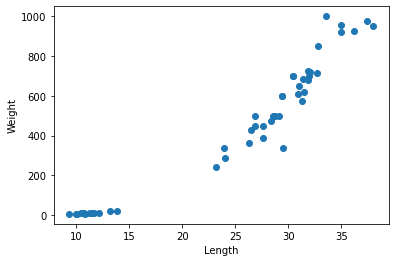

In [275]:
plt.figure(figsize=(6,4))
plt.scatter(length, weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [286]:
mean_length = np.mean(length)
mean_weight = np.mean(weight)

In [287]:
diff_length = sum([(i-mean_length)**2 for i in length])
print(diff_length)

4086.8138775510206


In [288]:
def top(X, meanX, Y, meanY):
    diff_value = 0
    for i in range(len(X)):
        diff_value += (X[i] - meanX) * (Y[i] - meanY)
    return diff_value

In [289]:
diff_num = top(length, mean_length, weight, mean_weight)
print('분모 : ', diff_length)
print('분자 : ', diff_num)

분모 :  4086.8138775510206
분자 :  139572.90999999997


In [296]:
a = diff_num / diff_length
b = mean_weight - (mean_length * a)
print('기울기 a =', a)
print('y절편 b =', b)

기울기 a = 34.15201038801345
y절편 b = -404.6304950146281


In [297]:
predict_weight = a * length + b
err = weight - predict_weight
print(predict_weight, weight)

[537.96499169 510.64338338 790.68986857 739.46185298 654.08182701
 411.60255326 633.59062078 -39.20398386 712.14024467 -18.71277763
 664.32743013 831.67228103 688.2338374  715.55544571 565.2866
 872.6546935   66.66724834 667.74263117 599.43861039 671.15783221
 -15.29757659 790.68986857 510.64338338 684.81863636 -18.71277763
 589.19300728   8.60883068 602.85381143  46.17604211 681.40343532
 537.96499169  -5.05197347 -59.6951901  568.70180104 -35.78878282
 -49.44958698 575.53220312 650.66662597 -87.01679841 500.39778027
 599.43861039 -63.11039113 415.0177543  -11.88237555 633.59062078
 681.40343532 387.69614599 493.56737819 893.14589973] [ 450.   450.   920.  1000.   650.   340.   700.     9.8  714.    10.
  575.   925.   720.   850.   475.   975.    19.9  685.   600.   620.
    9.8  955.   500.   700.     9.9  500.    12.2  340.    19.7  725.
  390.    13.4    7.   500.     8.7    9.7  500.   610.     6.7  430.
  600.     7.5  290.    12.2  700.   680.   242.   363.   950. ]


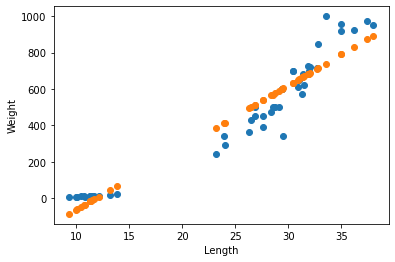

In [298]:
plt.figure(figsize=(6,4))
plt.scatter(length, weight)
plt.scatter(length, predict_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show()

In [305]:
a = 0
b = 0

In [306]:
lr = 0.0028
epochs = 20000

In [307]:
for i in range(epochs):
    predict_weight = a * length + b
    err = weight - predict_weight
    
    a_diff = -(1/len(length)) * sum(length * err)
    b_diff = -(1/len(length)) * sum(err)
    
    a = a - lr * a_diff
    b = b - lr * b_diff
    
    if i % 100 == 0:
        print('epoch=%.f, 기울기=%.04f, 절편=%.04f' %(i, a, b))

epoch=0, 기울기=38.9204, 절편=1.2446
epoch=100, 기울기=20.9208, 절편=-12.6613
epoch=200, 기울기=20.7368, 절편=-25.5019
epoch=300, 기울기=21.1542, 절편=-37.9015
epoch=400, 기울기=21.5786, 절편=-49.8948
epoch=500, 기울기=21.9897, 절편=-61.4958
epoch=600, 기울기=22.3875, 절편=-72.7175
epoch=700, 기울기=22.7722, 절편=-83.5722
epoch=800, 기울기=23.1444, 절편=-94.0718
epoch=900, 기울기=23.5044, 절편=-104.2282
epoch=1000, 기울기=23.8526, 절편=-114.0523
epoch=1100, 기울기=24.1894, 절편=-123.5552
epoch=1200, 기울기=24.5152, 절편=-132.7473
epoch=1300, 기울기=24.8304, 절편=-141.6388
epoch=1400, 기울기=25.1352, 절편=-150.2395
epoch=1500, 기울기=25.4301, 절편=-158.5590
epoch=1600, 기울기=25.7153, 절편=-166.6063
epoch=1700, 기울기=25.9912, 절편=-174.3905
epoch=1800, 기울기=26.2581, 절편=-181.9202
epoch=1900, 기울기=26.5163, 절편=-189.2035
epoch=2000, 기울기=26.7660, 절편=-196.2487
epoch=2100, 기울기=27.0075, 절편=-203.0635
epoch=2200, 기울기=27.2412, 절편=-209.6554
epoch=2300, 기울기=27.4672, 절편=-216.0318
epoch=2400, 기울기=27.6858, 절편=-222.1996
epoch=2500, 기울기=27.8973, 절편=-228.1657
epoch=2600, 기울기=28.1018, 절편=-233.93